## Phase 3.29
# Decision Trees

## Objectives
- Get a high-level introduction to <a href='#dt'>Decision Trees</a>
- Talk through internal <a href='#metrics'>Metrics</a> the trees use.
- Look at the <a href='#process'>Process</a> trees use to predict.
- Take a quick look at <a href='#grid'>GridSearchCV</a>.

- <a href='#build'>Build</a> a tree!

<a id='dt'></a>
# Decision Trees

## The Basics
- Decision Trees are the most basic "*tree-based*" algorithm that you will use as a Data Scientist.
- By themselves, Decision Trees are not sophisticated or robust to be used in real-world problems.
- **However**, *stumps* (trees that are not allowed to grow very large) are often used as either Baseline Models or in Ensemble Classifiers.


## An Interactive Visual

http://www.r2d3.us/visual-intro-to-machine-learning-part-1/
    

<a id='process'></a>
## Tree Process
1. There are features and a target (either class or value)


2. Train the tree to make a *decision* (a split) about which feature best separates the data, based on some *metric* 
    - Data are split into partitions/branches
    - Metrics include 'Gini Index', 'entropy'
    
    
3. Continue growing each branch of the tree until a stopping criterion is reached.


4. Keep doing that until a **stopping condition** is hit.
    
    
5. Test the trees decisions using previously unseen data.

<img src='./images/tree.png' width='600'>

<a id='metrics'></a>
## Tree Metrics

### Entropy
> **Entropy is a measure of disorder or uncertainty.**
>
> The entropy of a variable is the "amount of information" contained in the variable. 
>
> - We can informally describe entropy as an indicator of how messy your data is.  A high degree of entropy always reflects "messed-up" data with low/no information content. 

$$\large H(S) = -\sum (P_i . log_2(P_i))$$

When  $H(S) = 0$, this means that the set $S$ is perfectly classified, meaning that there is no disorganization in our data because all of our data in S is the exact same class. 
- More computationally expensive. (Uses $log$ function.)

### Gini Impurity
> **The Gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.**
> *Using simple probabilities.*

*The Gini Impurity is defined as:*

$\large G = 1 - \Sigma_ip_i^2$, or, equivalently, $\large G = \Sigma_ip_i(1-p_i)$.

where, again, $p_i$ is the probability of belonging to the $i$th group.

Gini Impurity will always be between 0 and 0.5. The closer to 0.5, the more disordered your group.
- Faster to compute. (Preferred.)

<img src='./images/entropy_and_gini.png' width='800'>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# For plotting the tree.
from sklearn.tree import export_graphviz, plot_tree
from pydotplus import graph_from_dot_data
from IPython.display import Image

In [2]:
%matplotlib inline
plt.style.use(['ggplot', 'seaborn-talk'])

### Note on Graphviz
You can see what rules the tree learned by plotting this decision tree. To do this, you need to use additional packages such as `pytdotplus`. 

> **Note:** If you are run into errors while generating the plot, you probably need to install `python-graphviz` in your machine using `conda install python-graphviz`. 

---

***If the above alone did not work:***
> NOTE ON INSTALLING GRAPHVIZ:
- On windows you must [download the Graphviz installer](https://www.graphviz.org/download/) (Choose the "stable" release), install it, and then add the `bin` folder inside of it to your system's Path.
- [To Edit your path on MaC](https://www.architectryan.com/2012/10/02/add-to-the-path-on-mac-os-x-mountain-lion/)

- [TO Edit Your Path on Windows (10)](https://www.architectryan.com/2018/03/17/add-to-the-path-on-windows-10/)

<a id='build'></a>
# Build a Decision Tree! Walkthrough

In [3]:
# Load data.
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

In [5]:
# Split data into X, y.
X = df.drop('species', axis=1)
y = df.loc[:, 'species']

X.shape, y.shape

((150, 4), (150,))

In [6]:
# Encode `species` with LabelEncoder
encoder = LabelEncoder()
# list(zip(y.values, encoder.fit_transform(y)))
y_encoded = encoder.fit_transform(y)
y_encoded.shape

(150,)

In [7]:
# Encoder attribute: .classes_
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
# Instantiate and fit DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=51)
dt.fit(X, y)

DecisionTreeClassifier(random_state=51)

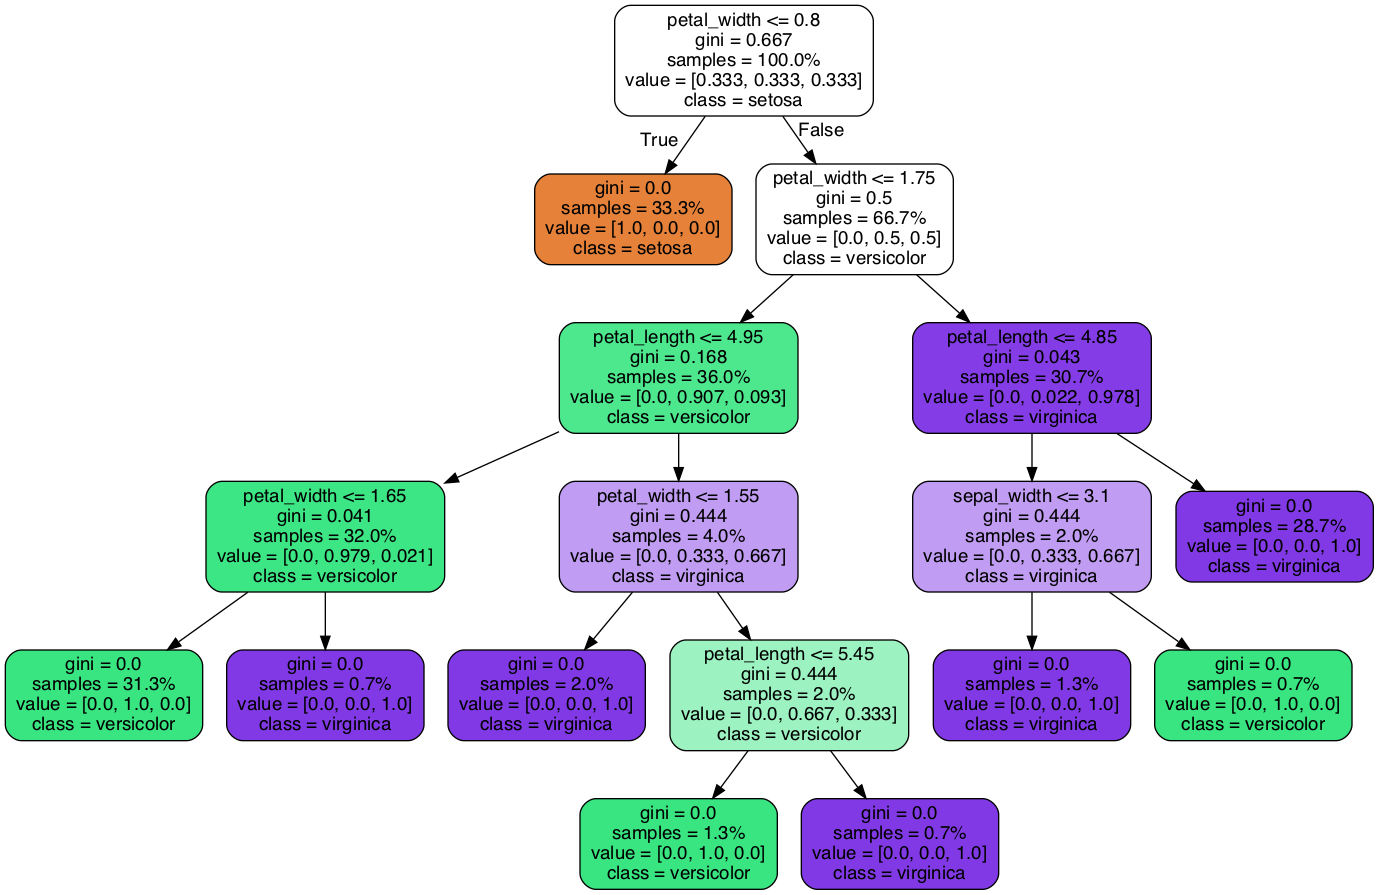

In [9]:
# Graphviz workflow.
dot_data = export_graphviz(
    decision_tree=dt, ### Tree
    feature_names=X.columns, ### Features
    class_names=encoder.classes_, ### Class Names
    filled=True, 
    rounded=True,
    proportion=True,
    )

graph = graph_from_dot_data(dot_data)

Image(graph.create_png())

In [10]:
# Check feature_importances_ and plot!
dt.feature_importances_

array([0.        , 0.01333333, 0.06405596, 0.92261071])

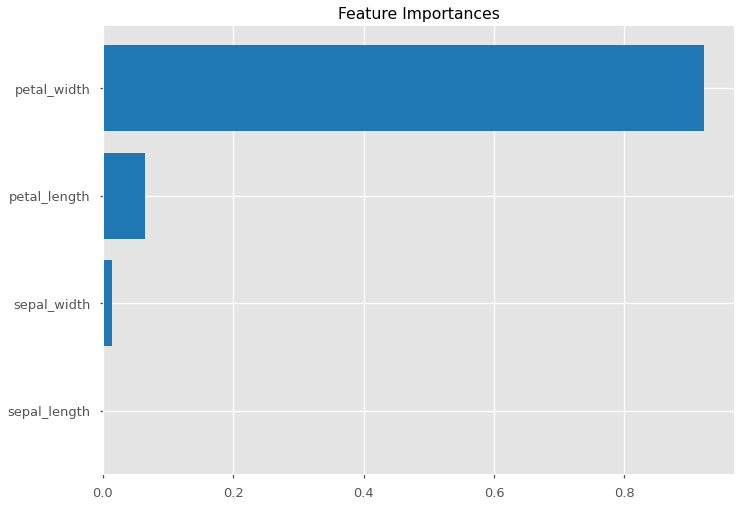

In [11]:
# Plot feature importances.
fig, ax = plt.subplots()
ax.barh(X.columns, dt.feature_importances_, color='tab:blue')
ax.set(title='Feature Importances')
fig.tight_layout()

**Trees can get very large!!**

<img src='./images/large_tree.png'>

<a id='grid'></a>
# Intro to GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
# Instantiate new DT
dt_gridsearch = DecisionTreeClassifier(random_state=51)

In [14]:
# Create params grid to check.
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 3, 5, None],
    'max_features': ['sqrt', 'log2', None]
}

In [15]:
# Instantiate GridSearchCV object.
grid = GridSearchCV(dt_gridsearch, params, verbose=1)

# Fit gridsearch.
grid.fit(X, y_encoded)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=51),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, None],
                         'max_features': ['sqrt', 'log2', None]},
             verbose=1)

In [16]:
# Find best estimator.
best_estimator = grid.best_estimator_

# Make predictions on X.
best_estimator.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
# Find best params.
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': None}

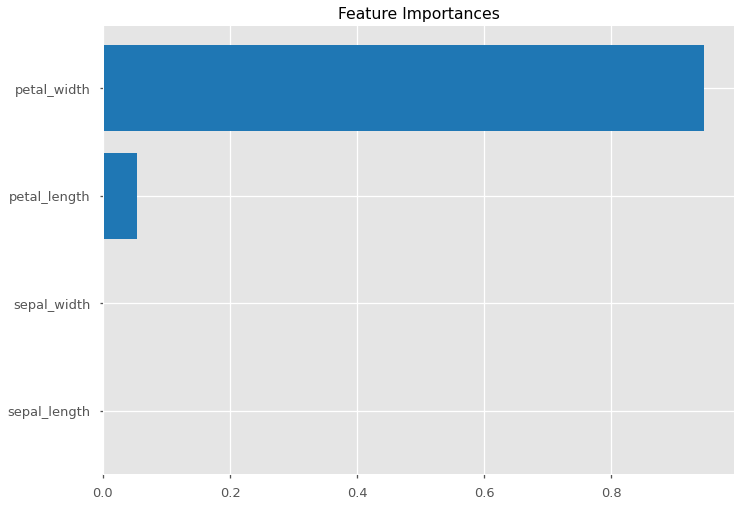

In [18]:
fig, ax = plt.subplots()
ax.barh(X.columns, best_estimator.feature_importances_, color='tab:blue')
ax.set(title='Feature Importances')
fig.tight_layout()

# Pros and Cons
## Pros
- Interpretability.
    - Render **feature importance**.
- Less data pre-processing needed.
    
    
## Cons
- Do not predict a continuous output (for regression).
- Does not predict beyond range of the training data.
- Overfits **very easily**.

***Additional Resource***
- https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb